# PS8 | Muath Hamidi

In [1]:
#==================================================
# Course: PHYS 512
# Problem: PS8
#==================================================
# By: Muath Hamidi
# Email: muath.hamidi@mail.mcgill.ca
# Department of Physics, McGill University
# November 2022

#==================================================
# Libraries
#==================================================
import numpy as np # For math
import matplotlib.pyplot as plt # For graphs


# Problem 1


The solution is a complex exponential and has the form;
\begin{equation}
f(x,t)=\xi^{t}exp(ikx)
\end{equation}
Substitute in the leapfrog scheme
\begin{equation}
\frac{exp(ikx)(\xi^{t+dt}-\xi^{t-dt})}{2dt}=\frac{exp(ikx)\xi^{t}(\xi^{+dt}-\xi^{-dt})}{2dt}
\end{equation}
Take this as the LHS. Now, the RHS;
\begin{equation}
-v\frac{exp(ikx)\xi^{t}(exp(+ikdx)-exp(-ikdx)}{2dx}
\end{equation}
Match the both sides;
\begin{equation}
\frac{exp(ikx)\xi^{t}(\xi^{+dt}-\xi^{-dt})}{2dt} = -v\frac{exp(ikx)\xi^{t}(exp(+ikdx)-exp(-ikdx)}{2dx}
\end{equation}
So,
\begin{equation}
\to \xi^{+dt}-\xi^{-dt} = v\frac{dt}{dx}(2i sin(kdx))
\end{equation}
Multiply both sides by $\xi^{+dt}$
\begin{equation}
\to \xi^{2dt} - 2iv\frac{dt}{dx}\xi^{dt}sin(kdx) -1 = 0
\end{equation}
So, the solution is;
\begin{equation}
\to \xi^{dt} = \frac{2iv\frac{dt}{dx}sin(kdx) \pm \sqrt{-4v^{2}(\frac{dt}{dx})^{2}sin^{2}(kdx) + 4}}{2}
\end{equation}
\begin{equation}
\to \xi^{dt} = iv\frac{dt}{dx}sin(kdx) \pm \sqrt{-v^{2}(\frac{dt}{dx})^{2}sin^{2}(kdx) + 1}
\end{equation}
This is a complex solution. If $v\frac{dt}{dx}≤1$ then $|\xi^{dt}|^{2}=1$. If $v\frac{dt}{dx}>1$ then the solution is not in our interest.

# Problem 2

First, let's use the average neighbours method to find the potential;

V[0,0] =  1.0
rho[0,0] =  1.0
V[1,0] =  0.0
V[2,0] =  -0.4533841134643257
V[5,0] =  -1.050788709610979


Text(0.5, 1.0, 'Potential')

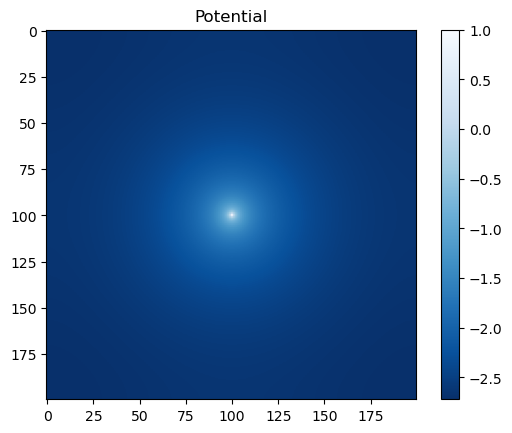

In [137]:
#==================================================
# Part a
#==================================================
# Functions
#==================================================
def average_neighbors(mat):
    out=0*mat
    out=out+np.roll(mat,1,0)
    out=out+np.roll(mat,-1,0)
    out=out+np.roll(mat,1,1)
    out=out+np.roll(mat,-1,1)
    return out/4

#==================================================
# Average Neighbours Method
#==================================================
size = 200
s2 = int(abs(size/2))
V = np.zeros([size,size]) # V array
V[s2, s2] = 1 # origion
iterations = 10000

for i in np.arange(iterations):
    V = average_neighbors(V)
    V[s2, s2] +=1 # origin


scale = 1 - V[s2, s2]
V = V + scale

#==================================================
# Print Chosen Values
#==================================================
r0 = V[s2, s2] + average_neighbors(V)[s2, s2]
v0 = V[s2, s2]
v1 = V[s2 + 1, s2]
v2 = V[s2 + 2, s2]
v5 = V[s2 + 5, s2]
print("V[0,0] = ", v0)
print("rho[0,0] = ",r0)
print("V[1,0] = ", v1)
print("V[2,0] = ", v2)
print("V[5,0] = ", v5)

#==================================================
# Plot - Greens' Function
#==================================================
plt.imshow(V, cmap="Blues_r")
plt.colorbar()
plt.title("Potential")

Nice and realistic, with true potential values as in the question.

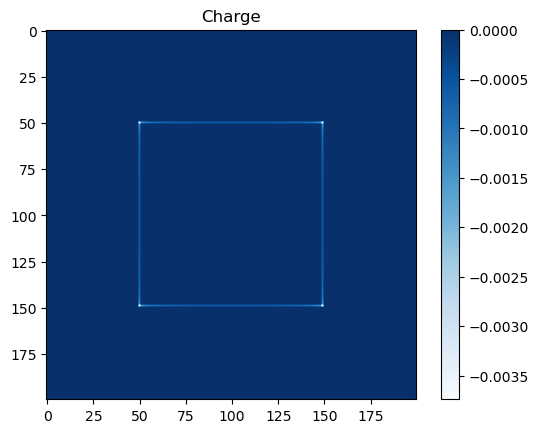

Text(0.5, 1.0, 'Charge Density Along One Side')

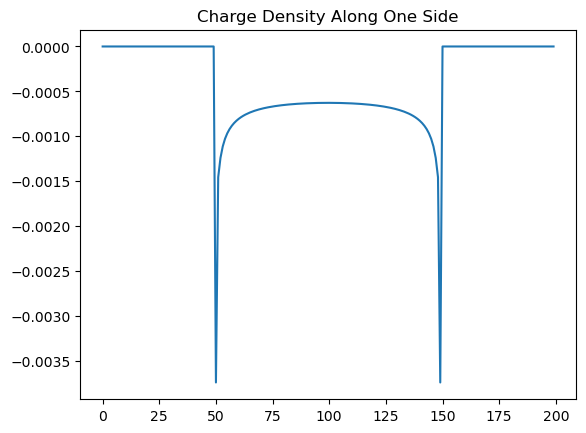

In [138]:
#==================================================
# Part b
#==================================================
# Functions
#==================================================
dim = s2 # the square (shape) mask dimension
dim2 = int(dim/2)
mask = np.zeros([size, size], dtype = bool)
mask[dim - dim2 : dim + dim2, dim - dim2 : dim + dim2] = 1

#==================================================
# Functions
#==================================================
def MaskConv(rho, mask):
    rho_mask = np.zeros(mask.shape)
    rho_mask[mask] = rho
    return np.fft.fftshift(np.fft.irfft2(np.fft.rfft2(V) * np.fft.rfft2(rho_mask)))[mask]

def conjgrad(A, b, mask, x): # Conjugate gradient
    iterarions = 5000
    r = b - A(x, mask)
    p = r.copy()
    rtr = np.sum(r**2)

    for i in range(iterarions):
        Ap=A(p, mask)
        pAp=np.sum(p*Ap)
        alpha=rtr/pAp
        x=x+alpha*p
        r=r-alpha*Ap
        rtr_new=np.sum(r**2)
        beta=rtr_new/rtr
        p=r+beta*p
        rtr=rtr_new
    return x

#==================================================
# Distribution
#==================================================
rho = conjgrad(MaskConv, mask[mask], mask, mask[mask])

mask_rho = np.zeros(mask.shape)
mask_rho[mask] = rho

#==================================================
# Plots
#==================================================
plt.imshow(mask_rho, cmap="Blues")
plt.title("Charge")
plt.colorbar()
plt.show()
plt.close()

plt.plot(mask_rho[:, s2 + dim2 - 1])
plt.title("Charge Density Along One Side")

This is expected as the charge density will be maximum at the corners due to their repulsive force.

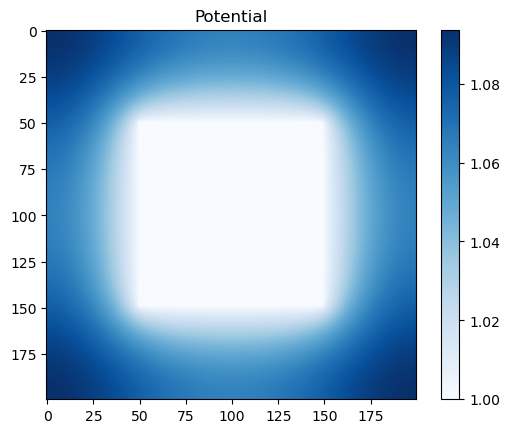

Potential mean =  1.0000000000024702
Maximum potential difference on the mask =  4.2953640644327606e-11


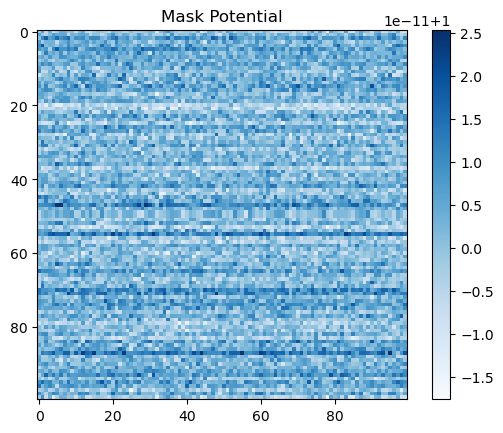

In [139]:
#==================================================
# Part c
#==================================================
# Plot Potential
#==================================================
Pot = np.fft.fftshift(np.fft.irfft2(np.fft.rfft2(V) * np.fft.rfft2(mask_rho)))
plt.imshow(Pot, cmap="Blues")
plt.title("Potential")
plt.colorbar()
plt.show()
plt.close()

#==================================================
# Plot - Mask Potential
#==================================================
plt.imshow(Pot[50:150, 50:150], cmap="Blues")
plt.title("Mask Potential")
plt.colorbar()

#==================================================
# Calculations - Maximum potential difference on the mask
#==================================================
vmin = np.min(Pot[50:150, 50:150])
vmax = np.max(Pot[50:150, 50:150])
print("Potential mean = ", Pot[50:150, 50:150].mean())
print("Maximum potential difference on the mask = ", vmax - vmin)

As you can see, the maximum potential difference on the mask is in order of $10^{-11}$, so the potential in the interior is really close to constant (=1).

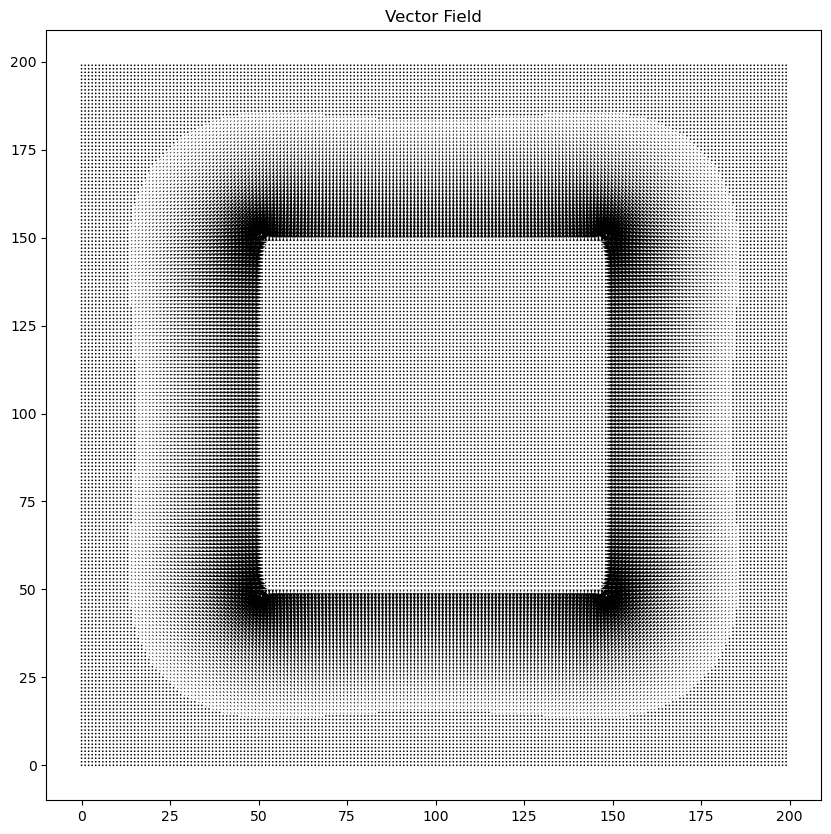

In [174]:
#==================================================
# Plot - Field Strength
#==================================================
Ex = (np.roll(Pot,1,axis=1) - np.roll(Pot,-1,axis=1))
Ey = (np.roll(Pot,-1,axis=0) - np.roll(Pot,1,axis=0))

# Vector Field
Vectors = np.zeros(Pot.shape)
X = np.arange(size)
Y = np.arange(size)
plt.figure(figsize=(10,10))
plt.quiver(X,Y,Ex,Ey, linewidth=0.5)
plt.title("Vector Field")
plt.show()
plt.close()


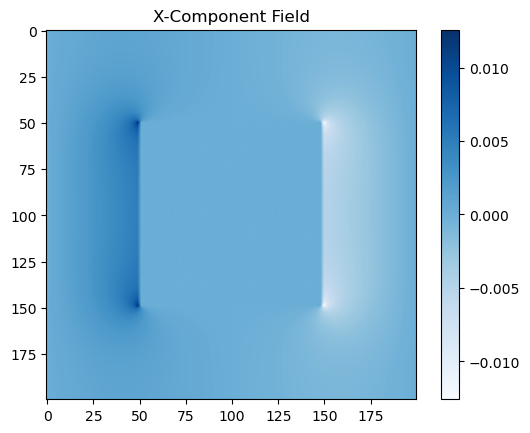

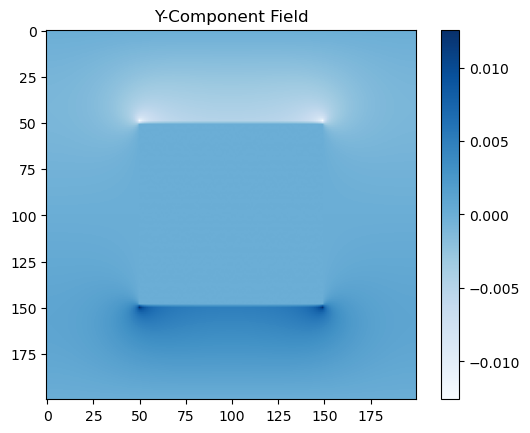

Text(0.5, 1.0, 'Vector Field')

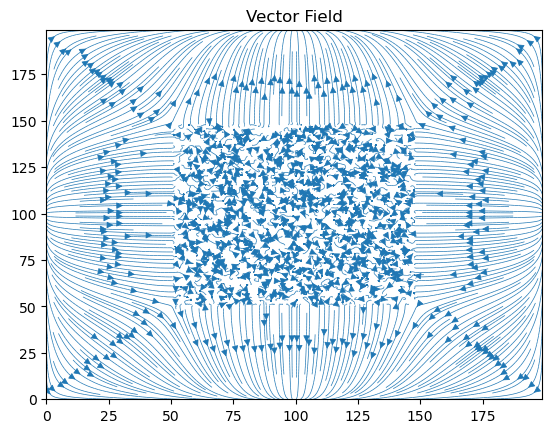

In [175]:
# x - component
plt.imshow(Ex, cmap="Blues")
plt.colorbar()
plt.title("X-Component Field")
plt.show()
plt.close()

# y - component
plt.imshow(Ey, cmap="Blues")
plt.colorbar()
plt.title("Y-Component Field")
plt.show()
plt.close()

# Vector Field - Direction
Vectors = np.zeros(Pot.shape)
X = np.arange(size)
Y = np.arange(size)
plt.streamplot(X,Y,Ex,Ey, density=4, linewidth=0.5)
plt.title("Vector Field")

This is what we expect. Strong field near the corners.